### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib.patches import Patch

# Problems

#### Use the prompts below to get started with your data analysis.  

## 1. Read in the `coupons.csv` file.




In [169]:
## read data from github repository
df = pd.read_csv('https://raw.githubusercontent.com/tinalount/BerkeleyAIML/main/5.1/data/coupons.csv')

## read from local conputer: df = pd.read_csv('/Users/tinalount/Desktop/Data/coupons.csv')


In [149]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## INVESTIGATE THE DATA and VARIABLES

In [150]:
# list all the columns
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [151]:
# get statistics on all the numeric columns in the data 
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
# how many rows are in the data?
num_rows = df.shape[0]
print("The coupons.csv file has", num_rows, "rows")

The coupons.csv file has 12684 rows


In [152]:
#get general info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Understand the DEPENDENT VARIABLE we are trying to predict, Y = 1 for YES will use coupon and Y =0 for won't use coupon

In [153]:
## Understand the value categories and labels for DEPENDENT VARIABLE, Y (whether customer will use coupon)
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

Text(0.5, 1.0, 'Coupon Redemption Summary')

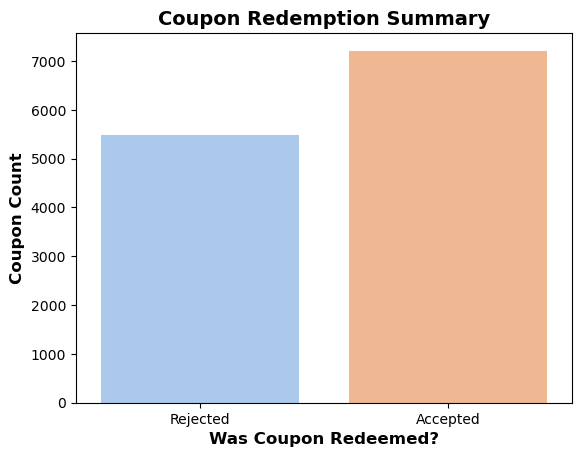

In [206]:
# use a seaborn countplot display the Y Variable showing how many customers accept vs reject the coupon?

Y_variable_plot = sns.countplot(data=df, x='Y', palette ='pastel')
#increase the font size and make the labels bold for x and y axes
#Set the x-label
Y_variable_plot.set_xlabel("Was Coupon Redeemed?", fontsize=12, weight='bold')
#Set the y-label
Y_variable_plot.set_ylabel("Coupon Count", fontsize=12, weight='bold')
#Replace the x-axis values 0 and 1 with more understandable text
Y_variable_plot.set_xticklabels(["Rejected", "Accepted"])
#Title the graph
Y_variable_plot.set_title("Coupon Redemption Summary", fontsize=14, weight='bold')

##### More people accepted (redeemed) the coupons than rejected them

In [155]:
# Calculate the percentage of customers accepting and rejecting the coupon
percentAccept = (df['Y'] == 1).mean() * 100
percentReject = (df['Y'] == 0).mean() * 100
# limit the decimal place to 2
percentAccept = round(percentAccept, 2)
percentReject = round(percentReject, 2)

print(f"Percentage of customers accepting the coupon: {percentAccept}%")
print(f"Percentage of customers rejecting the coupon: {percentReject}%")

Percentage of customers accepting the coupon: 56.84%
Percentage of customers rejecting the coupon: 43.16%


### Understand the 10 CONTEXTUAL VARIABLES (destination, direction - same, direction - opp, passenger, weather, temperature, time of day)

In [156]:
## Understand the value categories and labels for independent variable, destination
df['destination'].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

In [25]:
## Understand the valus and labels for independent variable, direction_same
df['direction_same'].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

In [27]:
## Understand the valus and labels for independent variable, direction_opp
df['direction_opp'].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [46]:
## Understand the valus and labels for independent variable, toCoupon_GEQ5min
df['toCoupon_GEQ5min'].value_counts()

1    12684
Name: toCoupon_GEQ5min, dtype: int64

In [47]:
## Understand the valus and labels for independent variable, toCoupon_GEQ15min
df['toCoupon_GEQ15min'].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [48]:
## Understand the valus and labels for independent variable, toCoupon_GEQ25min
df['toCoupon_GEQ25min'].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [13]:
## Understand the value categories and labels for independent variable, passanger
df['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [14]:
## Understand the value categories and labels for independent variable, weather
df['weather'].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

In [109]:
## Understand the value categories and labels for independent variable, temperature
df['temperature'].value_counts().sort_values()

30    2316
55    3840
80    6528
Name: temperature, dtype: int64

In [17]:
## Understand the value categories and labels for independent variable, time
df['time'].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

### Understand the 7 COUPON ATTRIBUTE VARIABLES (type, expiration time)

In [34]:
## Understand the value categories and labels for independent variable, coupon type
df['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [35]:
## Understand the value categories and labels for independent variable, expiration
df['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [41]:
## Understand the value categories and labels for independent variable, Bar Coupon
df['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [42]:
## Understand the value categories and labels for independent variable, CoffeeHouse Coupon
df['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [43]:
## Understand the value categories and labels for independent variable, CarryAway restaurant Coupon
df['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [44]:
## Understand the value categories and labels for independent variable, Restaurant Coupon Worth under $20
df['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [45]:
## Understand the value categories and labels for independent variable, Restaurant Coupon Worth $20-$50
df['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

### Understand the 7 USER ATTRIBUTE VARIABLES (gender, age, marital status, has children, education, occupation, income and car) - this just helps get an overall sense of the data before diving into analysis

In [22]:
## Understand the value categories and labels for independent variable, gender
df['gender'].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

In [138]:
px.bar(df['gender'].value_counts())

In [23]:
## Understand the value categories and labels for independent variable, age
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [137]:
px.bar(df['age'].value_counts())

In [36]:
## Understand the value categories and labels for independent variable, maritalStatus
df['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [136]:
px.bar(df['maritalStatus'].value_counts())

In [135]:
## Understand the value categories and labels for independent variable, has_children
df['has_children'].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

In [134]:
px.bar(df['has_children'].value_counts())

In [37]:
## Understand the value categories and labels for independent variable, education
df['education'].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

In [132]:
px.bar(df['education'].value_counts())

In [130]:
## Understand the value categories and labels for independent variable, occupation
df['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Personal Care & Service                       175
Protective Service                            175
Architecture & Engineering                    175
Life Physical Social Science                  170


In [131]:
px.bar(df['occupation'].value_counts())

#### this visualization makes it clear that the most coupons were given to unemployed people and students

In [40]:
## Understand the value categories and labels for independent variable, income
df['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [139]:
px.bar(df['income'].value_counts())

In [157]:
## Understand the value categories and labels for independent variable, car
df['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

In [140]:
px.bar(df['car'].value_counts())

## 2. Investigate the dataset for missing or problematic data.

## CHECK DATA FOR NULL VALUES

In [165]:
## count the null values for each attribute
df.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

 ## Data Cleanup 

In [170]:
#fix typo in passanger column heading to be "passenger"
df_clean = df.rename(columns={'passanger': 'passenger'})
df_clean.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [176]:
#print only the data rows for when Bar is null
print(df.loc[df['Bar'].isna()])

           destination  passanger weather  temperature  time  \
517    No Urgent Place  Friend(s)   Sunny           80  10AM   
518    No Urgent Place  Friend(s)   Sunny           80   2PM   
519    No Urgent Place  Friend(s)   Sunny           80   2PM   
520    No Urgent Place  Friend(s)   Sunny           80   6PM   
521    No Urgent Place  Friend(s)   Sunny           55   2PM   
...                ...        ...     ...          ...   ...   
12168             Work      Alone   Rainy           55   7AM   
12169             Work      Alone   Rainy           55   7AM   
12170             Work      Alone   Snowy           30   7AM   
12171             Work      Alone   Snowy           30   7AM   
12172             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender     age maritalStatus  ...  \
517                      Bar         1d    Male  50plus      Divorced  ...   
518             Coffee House         1d    Male  50plus      Divorced  ... 

In [178]:
#count the data rows that have a null in all 5 columns that have nulls = 42 of those rows have nulls in all 5 columsn

print(df.loc[df['Bar'].isna() & df['RestaurantLessThan20'].isna() & df['CarryAway'].isna() & df['CoffeeHouse'].isna()])

          destination  passanger weather  temperature  time  \
517   No Urgent Place  Friend(s)   Sunny           80  10AM   
518   No Urgent Place  Friend(s)   Sunny           80   2PM   
519   No Urgent Place  Friend(s)   Sunny           80   2PM   
520   No Urgent Place  Friend(s)   Sunny           80   6PM   
521   No Urgent Place  Friend(s)   Sunny           55   2PM   
522   No Urgent Place      Alone   Sunny           55  10AM   
852   No Urgent Place    Partner   Sunny           80  10AM   
853   No Urgent Place    Partner   Sunny           80  10AM   
854   No Urgent Place    Partner   Sunny           80  10AM   
855   No Urgent Place    Partner   Sunny           80  10AM   
856   No Urgent Place    Partner   Sunny           80   6PM   
857   No Urgent Place    Partner   Sunny           80   6PM   
1166  No Urgent Place    Partner   Sunny           80  10AM   
1167  No Urgent Place    Partner   Sunny           80  10AM   
1168  No Urgent Place    Partner   Sunny           80  

## 3. Decide what to do about your missing data -- drop, replace, other...

In [171]:
# drop the car column from the data since it is likely redundant with income and occupation and there are over 12K null values
df_clean = df_clean.drop(axis=1, columns='car')

In [175]:
prbint("Original Column Headings:", df.columns)
print("Cleaned Column Headings:", df_clean.columns)

Original Column Headings: Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')
Cleaned Column Headings: Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [186]:
# replace nulls for Coupon Type columns with "NoAnswer"
df_clean[['Bar', 'RestaurantLessThan20','Restaurant20To50', 'CarryAway', 'CoffeeHouse']] = df_clean[['Bar', 'RestaurantLessThan20','Restaurant20To50','CarryAway', 'CoffeeHouse']].replace(np.nan, "NoAnswer")

In [187]:
## check the clean dataset has no nulls
df_clean.isnull().sum().sort_values()

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passenger               0
education               0
Y                       0
dtype: int64

In [199]:
# how many rows are in the cleaned up data?
num_rows_clean = df_clean.shape[0]
print("The cleaned coupons dataframe has", num_rows_clean, "rows")

The cleaned coupons dataframe has 12684 rows


## 4. What proportion of the total observations chose to accept the coupon? 

In [61]:
# Calculate the percentage of customers accepting and rejecting the coupon
percentAccept = (df['Y'] == 1).mean() * 100
percentReject = (df['Y'] == 0).mean() * 100
# limit the decimal place to 2
percentAccept = round(percentAccept, 2)
percentReject = round(percentReject, 2)

print(f"Percentage of customers accepting the coupon: {percentAccept}%")
print(f"Percentage of customers rejecting the coupon: {percentReject}%")

Percentage of customers accepting the coupon: 56.84%
Percentage of customers rejecting the coupon: 43.16%


## 5. Use a bar plot to visualize the `coupon` column.

In [70]:
# Count the number of occurrences of each unique value in the 'coupon' column
coupon_counts = df['coupon'].value_counts()
print(coupon_counts)

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


In [73]:
# Sort the counts in ascending order
coupon_counts = coupon_counts.sort_index().sort_values()
print(coupon_counts)

Restaurant(20-50)        1492
Bar                      2017
Carry out & Take away    2393
Restaurant(<20)          2786
Coffee House             3996
Name: coupon, dtype: int64


### Coupon Count by Coupon Type

Text(0, 0.5, 'Coupon Count')

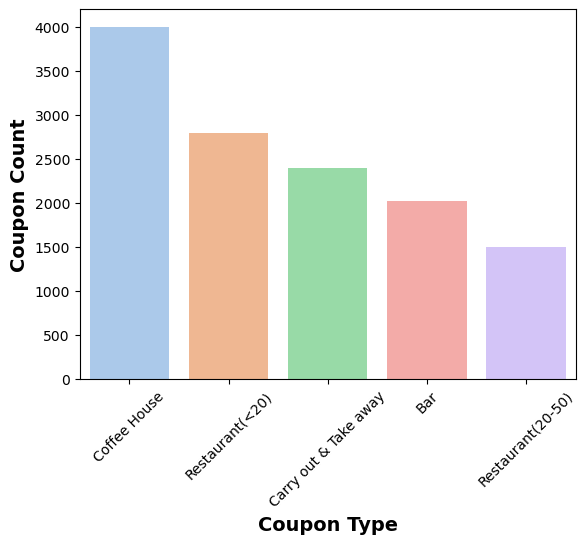

In [94]:
# Use seaborn to plot the coupon data - order bars in descending order and modify default plot color scheme
coupon_plot=sns.countplot(data=df, x='coupon', palette ='pastel', order=df['coupon'].value_counts().index)
#rotate the x labels to be more readable
plt.xticks(rotation=45)
#increase the font size and make the labels bold for x and y axes
#Set the x-label
coupon_plot.set_xlabel("Coupon Type", fontsize=14, weight='bold')
#Set the y-label
coupon_plot.set_ylabel("Coupon Count", fontsize=14, weight='bold')

#### The most coupons offered were for Coffee Houses

### Coupon Count by Coupon Type - broken by REDEEMED vs NOT REDEEMED COUNT

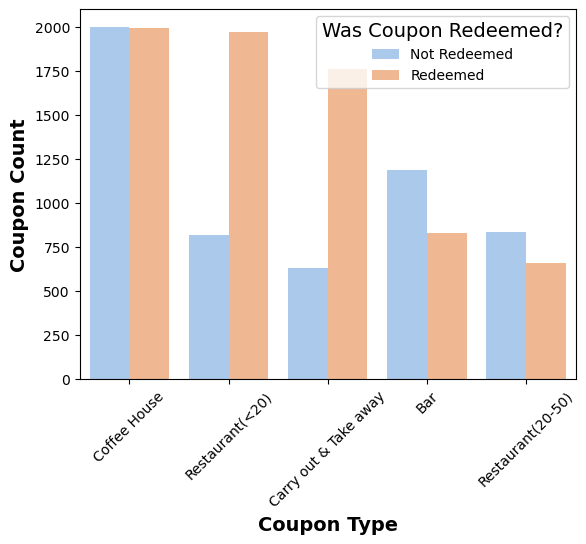

In [123]:
#Investigate how many coupons were redeemed by coupon type
#Create a countplot splitting the bars by the 'Y' column, and show the split between the values 1 and 0 for each 'coupon' value 
coupon_plot_by_acceptance = sns.countplot(data=df, x='coupon', hue='Y', palette ='pastel', order=df['coupon'].value_counts().index)

#rotate the x labels to be more readable
plt.xticks(rotation=45)
#increase the font size and make the labels bold for x and y axes
#Set the x-label
coupon_plot_by_acceptance.set_xlabel("Coupon Type", fontsize=14, weight='bold')
#Set the y-label
coupon_plot_by_acceptance.set_ylabel("Coupon Count", fontsize=14, weight='bold')
# Change the legend title and labels
coupon_plot_by_acceptance.legend(title='Was Coupon Redeemed?', labels=['Not Redeemed', 'Redeemed'], title_fontsize=14)


#### Interestingly, coupons were more likely to be redeemed for restaurants under 20 dollars in value or for carryout food. They were equally likely to be redeemed as not redeemed for coffee houses and less likely to be redeemed at Bars or Restaurants for over 20 dollars

#### Based on this finding it is recommended to offer more coupons for restaurants under 20 and carry out instead of for coffee houses that had a much lower redemption percentage


### Coupon Count by Coupon Type - broken by PERCENTAGE REDEEMED vs. PERCENTAGE NOT REDEEMED 

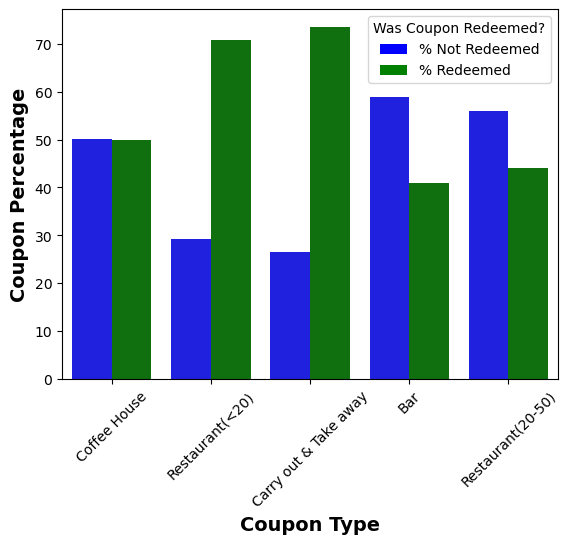

In [124]:
# graph this in terms of % redeemed versus % not redeemed usihg GROUPBY function to group data by Coupon Type and then Y

from matplotlib.patches import Patch

# set the palette for the hue split
palette = {0: 'b', 1: 'g'}

# group the data by 'coupon' and 'Y' column
df_group = df.groupby(['coupon','Y'])

# calculate percentage of coupons redeemed
df_percent = df_group.size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index()

# plot the percentage of coupons redeemed using barplot
coupon_plot_by_acceptance_percent = sns.barplot(x='coupon', y=0, hue='Y', data=df_percent,  palette = palette, order=df['coupon'].value_counts().index)

#rotate the x labels to be more readable
plt.xticks(rotation=45)
#increase the font size and make the labels bold for x and y axes
#Set the x-label
coupon_plot_by_acceptance_percent.set_xlabel("Coupon Type", fontsize=14, weight='bold')
#Set the y-label
coupon_plot_by_acceptance_percent.set_ylabel("Coupon Percentage", fontsize=14, weight='bold')
# Change the legend title and labels
#coupon_plot_by_acceptance_percent.legend(title='Was Coupon Redeemed?', labels=['% Not Redeemed', '% Redeemed'], title_fontsize=12)

#create a custom legend to have correct color in legend 
legend_elements = [Patch(facecolor='b', label='% Not Redeemed'),
                   Patch(facecolor='g', label='% Redeemed')]

plt.legend(handles=legend_elements, title='Was Coupon Redeemed?')


  #### Coupons for Restaurants under 20 dollars and Carry Out/Take Away had significantly higher percentage redeemed 

### 6. Use a histogram to visualize the temperature column.

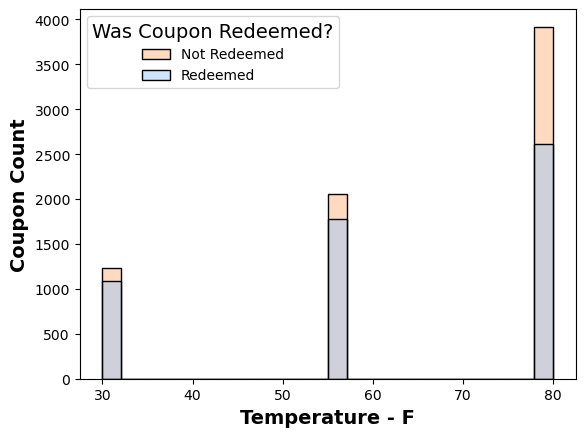

In [196]:
temp_plot = sns.histplot(df_clean, x='temperature', palette= 'pastel', hue='Y')
#Set the x-label
temp_plot.set_xlabel("Temperature - F", fontsize=14, weight='bold')
#Set the y-label
temp_plot.set_ylabel("Coupon Count", fontsize=14, weight='bold')
# Change the legend title and labels
temp_plot.legend(title='Was Coupon Redeemed?', labels=['Not Redeemed', 'Redeemed'], title_fontsize=14)

    #### a bigger portion of coupons are redeemed in the hotter 80F temperature

### **Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [210]:
df_clean_bar = df_clean.loc[df_clean['coupon'] == 'Bar']
df_clean_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passenger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   2017 non-null   object
 15  CoffeeHouse           2017 non-null  

### 2. What proportion of bar coupons were accepted?


In [213]:
df_clean_bar.Y.value_counts
# Calculate the percentage of customers accepting and rejecting the coupon
bar_percentAccept = (df_clean_bar['Y'] == 1).mean() * 100
bar_percentReject = (df_clean_bar['Y'] == 0).mean() * 100
# limit the decimal place to 2
bar_percentAccept = round(bar_percentAccept, 2)
bar_percentReject = round(bar_percentReject, 2)

print(f"Percentage of customers accepting the bar coupon: {bar_percentAccept}%")
print(f"Percentage of customers rejecting the bar coupon: {bar_percentReject}%")

Percentage of customers accepting the bar coupon: 41.0%
Percentage of customers rejecting the bar coupon: 59.0%


##### 41% of the bar coupons were accepted (this is lower than the average of 56.84% overall of coupons being accepted) so bar coupons were not as successful 

Text(0.5, 1.0, 'Coupon Redemption Summary for Bar Coupon')

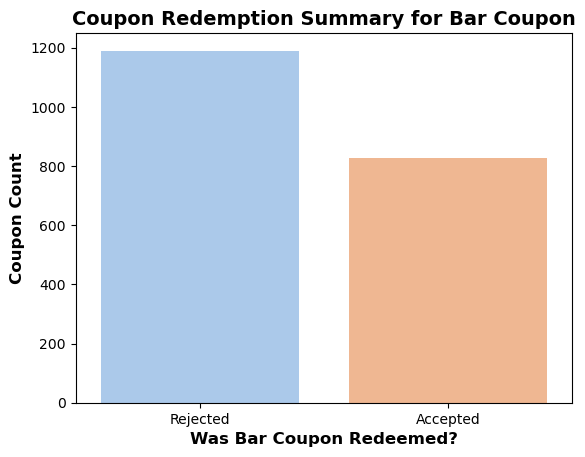

In [214]:
# use a seaborn countplot display the Y Variable showing how many customers accept vs reject the bar coupon?

Y_variable_plot_bar = sns.countplot(data=df_clean_bar, x='Y', palette ='pastel')
#increase the font size and make the labels bold for x and y axes
#Set the x-label
Y_variable_plot_bar.set_xlabel("Was Bar Coupon Redeemed?", fontsize=12, weight='bold')
#Set the y-label
Y_variable_plot_bar.set_ylabel("Coupon Count", fontsize=12, weight='bold')
#Replace the x-axis values 0 and 1 with more understandable text
Y_variable_plot_bar.set_xticklabels(["Rejected", "Accepted"])
#Title the graph
Y_variable_plot_bar.set_title("Coupon Redemption Summary for Bar Coupon", fontsize=14, weight='bold')

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [215]:
# recall possible categorical values for the Bar column data from earlier data assessment section:  
df['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [217]:
#make 2 new dataframes, one for each condition being analyzed - those who have been to bar 3 or less a month or 3 or more
bar_3_or_less = df_clean_bar.loc[df_clean_bar['Bar'].isin(['never', '1~3', 'less1'])]
bar_3_or_more = df_clean_bar.loc[df_clean_bar['Bar'].isin(['4~8', 'gt8'])]

# Calculate the percentage of customers accepting and rejecting the bar coupon for each condition
bar3_less_percentAccept = (bar_3_or_less['Y'] == 1).mean() * 100
bar3_more_percentAccept = (bar_3_or_more['Y'] == 1).mean() * 100
# limit the decimal place to 2
bar3_less_percentAccept = round(bar3_less_percentAccept, 2)
bar3_more_percentAccept = round(bar3_more_percentAccept, 2)

print(f"Percentage of customers accepting the bar coupon that frequent a bar 3 times or LESS/month: {bar3_less_percentAccept}%")
print(f"Percentage of customers accepting the bar coupon that frequent a bar MORE than 3 times/month: {bar3_more_percentAccept}%")





Percentage of customers accepting the bar coupon that frequent a bar 3 times or LESS/month: 37.06%
Percentage of customers accepting the bar coupon that frequent a bar MORE than 3 times/month: 76.88%


##### It is not really surprising that the data analysis shows that those who frequent a bar more than 3 times a month have a significantly higher bar coupon redemption percentage than those who don't go that often (76.88% compared to 37.06% coupon redemption)

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [218]:
# recall possible categorical values for the age column data from earlier data assessment section:  
df['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [222]:
#make a data frame that meets the two conditions of i) going to a bar more than once a month and ii) being over 25yo
bar_more_once= df_clean_bar.loc[df_clean_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_once_over25 = bar_more_once.loc[bar_more_once['age'].isin(['26', '31', '36', '41', '46', '50plus'])]

# Calculate the percentage of customers accepting the bar coupon for each condition
bar_more_once_over25_percentAccept = (bar_more_once_over25['Y'] == 1).mean() * 100

# limit the decimal place to 2
bar_more_once_over25_percentAccept = round(bar_more_once_over25_percentAccept, 2)


print(f"Percentage of customers accepting the bar coupon that frequent a bar >1ce/month and are over 25yo: {bar_more_once_over25_percentAccept}%")




Percentage of customers accepting the bar coupon that frequent a bar >1ce/month and are over 25yo: 69.52%


##### waiting for clarification on what to compare the 69.52% rate to? 
##### It seems that the bar coupon is more successful when targeted at older customers over 25 (who are allowed to go to bars!)

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [223]:
## Recall the value categories and labels for independent variable, passenger
df_clean['passenger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passenger, dtype: int64

In [226]:
## Recall the value categories and labels for independent variable, occupation
df_clean['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [227]:
#make a data frame that meets the three conditions of i) going to a bar more than once a month and ii) having non-kid passengers iii) occupations not farming/fishing/forestry
bar_more_once= df_clean_bar.loc[df_clean_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_once_notKid = bar_more_once.loc[~bar_more_once['passenger'].isin(['Kid(s)'])]
bar_more_once_notKid_notFarmFishForest = bar_more_once_notKid.loc[~bar_more_once_notKid['occupation'].isin(['Farming Fishing & Forestry'])]

# Calculate the percentage of customers accepting the bar coupon for each condition
bar_more_once_notKid_notFarmFishForest_percentAccept = (bar_more_once_notKid_notFarmFishForest['Y'] == 1).mean() * 100

# limit the decimal place to 2
bar_more_once_notKid_notFarmFishForest_percentAccept = round(bar_more_once_notKid_notFarmFishForest_percentAccept, 2)


print(f"Percentage of customers accepting the bar coupon that frequent a bar >1ce/month, aren't driving with a kid, and aren't Farmers,Fishermen, or Forestry workers: {bar_more_once_notKid_notFarmFishForest_percentAccept}%")


Percentage of customers accepting the bar coupon that frequent a bar >1ce/month, aren't driving with a kid, and aren't Farmers,Fishermen, or Forestry workers: 71.32%


##### the 71.32% of redeemed bar coupons for those that frequent a bar more than once/month, aren't driving with a kid and don't work in 'Farming FIshing & Forestry' is very similar to the 69.52% of redeemed bar couopns for those that frequent a bar more than once/month and are over 25  - perhaps these two condition scenarios are  defining overlapping data groups? This would require further investigation.

### 6. Compare the "bar" coupon acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [243]:
## Recall the value categories and labels for independent variable, maritalStatus
df['maritalStatus'].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

In [246]:
#make a data frame that meets the three conditions of i) going to a bar more than once a month and ii) having non-kid passengers iii) not widowed
bar_more_once= df_clean_bar.loc[df_clean_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_once_notKid = bar_more_once.loc[~bar_more_once['passenger'].isin(['Kid(s)'])]
bar_more_once_notKid_notWidowed = bar_more_once_notKid.loc[~bar_more_once_notKid['maritalStatus'].isin(['Widowed'])]

# Calculate the percentage of customers accepting the bar coupon for each condition
bar_more_once_notKid_notWidowed_percentAccept = (bar_more_once_notKid_notWidowed['Y'] == 1).mean() * 100

# limit the decimal place to 2
bar_more_once_notKid_notWidowed_percentAccept = round(bar_more_once_notKid_notWidowed_percentAccept, 2)


print(f"Percentage of customers accepting the bar coupon that frequent a bar >1ce/month, aren't driving with a kid, and aren't widowed: {bar_more_once_notKid_notWidowed_percentAccept}%")


Percentage of customers accepting the bar coupon that frequent a bar >1ce/month, aren't driving with a kid, and aren't widowed: 71.32%


In [248]:
#make a data frame that meets the two conditions of i) going to a bar more than once a month and ii) under 30 yo
bar_more_once= df_clean_bar.loc[df_clean_bar['Bar'].isin(['1~3', '4~8', 'gt8'])]
bar_more_once_under30 = bar_more_once.loc[bar_more_once['age'].isin(['below21','21','26'])]

# Calculate the percentage of customers accepting the bar coupon for each condition
bar_more_once_under30_percentAccept = (bar_more_once_under30['Y'] == 1).mean() * 100

# limit the decimal place to 2
bar_more_once_under30_percentAccept = round(bar_more_once_under30_percentAccept, 2)


print(f"Percentage of customers accepting the bar coupon that frequent a bar >1ce/month and are under 30yo: {bar_more_once_under30_percentAccept}%")


Percentage of customers accepting the bar coupon that frequent a bar >1ce/month and are under 30yo: 72.17%


In [251]:
## Recall the value categories and labels for independent variable, Restaurant under $20
df['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [252]:
## Recall the value categories and labels for independent variable, income
df['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [258]:
#ASSUMPTION: assuming the assignment meant to calculate the acceptance rate for bar coupon data given the scenario of going to cheap restaurants and income<$50K
#make a data frame that meets the two conditions of i) go to cheap restaurants >4times/month and ii) have income <50K
bar_cheap_rest_over4= df_clean_bar.loc[df_clean_bar['RestaurantLessThan20'].isin(['4~8', 'gt8'])]
bar_cheap_rest_over4_income_less50K = bar_cheap_rest_over4.loc[bar_cheap_rest_over4['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999'])]

# Calculate the percentage of customers accepting the bar coupon for each condition
bar_cheap_rest_over4_income_less50K_percentAccept = (bar_cheap_rest_over4_income_less50K['Y'] == 1).mean() * 100

# limit the decimal place to 2
bar_cheap_rest_over4_income_less50K_percentAccept= round(bar_cheap_rest_over4_income_less50K_percentAccept, 2)

print(f"Percentage of customers accepting the bar coupon that frequent cheap restaurants >4times/month and have income <$50K:{bar_cheap_rest_over4_income_less50K_percentAccept}%")


Percentage of customers accepting the bar coupon that frequent cheap restaurants >4times/month and have income <$50K:45.35%


##### Drivers that frequent cheap restaurants over 4times/month and have a low income under 50K only accept the bar coupon 45.35% of the time whereas drivers that frequent a bar more than once/month and are under 30yo have an acceptance rate of 72.17% and drivers that frequent a bar more than once/month and are not driving a kid and are not widowed also have a higher acceptance rate of 71.32%. 

##### Put all these acceptance percentages for the bar coupon scenarios all into one visualization for easier comparison

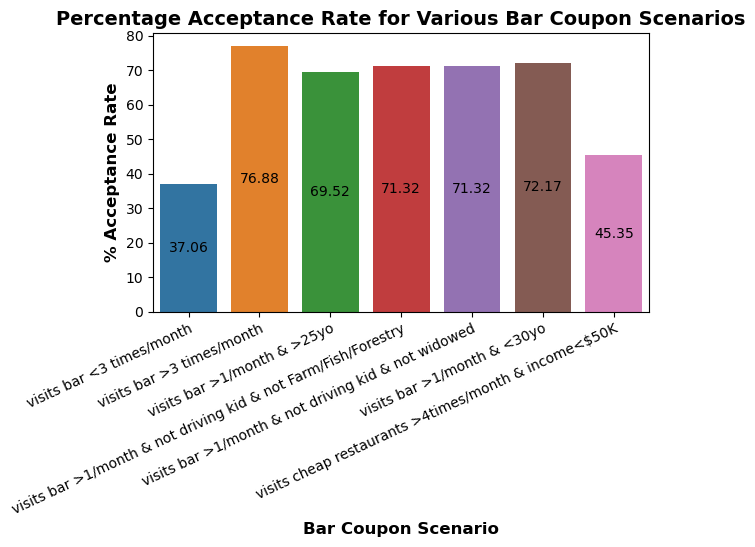

In [259]:
# create a new dataframe (bar_scenario_df) that gives the percentage coupon acceptance rate for each of the analyzed scenarios above
bar_scenario_data = {'bar coupon acceptance scenario': ['visits bar <3 times/month','visits bar >3 times/month','visits bar >1/month & >25yo','visits bar >1/month & not driving kid & not Farm/Fish/Forestry',
                                                        'visits bar >1/month & not driving kid & not widowed','visits bar >1/month & <30yo','visits cheap restaurants >4times/month & income<$50K'],
            'acceptance %': [bar3_less_percentAccept, bar3_more_percentAccept, bar_more_once_over25_percentAccept, bar_more_once_notKid_notFarmFishForest_percentAccept, 
                             bar_more_once_notKid_notWidowed_percentAccept, bar_more_once_under30_percentAccept, bar_cheap_rest_over4_income_less50K_percentAccept]}
bar_scenario_df = pd.DataFrame(bar_scenario_data)

#create a bar plot comparing the percentage acceptance rates for all the bar coupon scenarios analyzed
bar_scenario_plot = sns.barplot(x='bar coupon acceptance scenario', y='acceptance %', data=bar_scenario_df)

#rotate the x labels to be more readable
plt.xticks(rotation=25, ha='right')
# Adjust the width of the plot area to be wider than the default value to support wrapping labels
plt.subplots_adjust(bottom=0.3)

#wrap x labels text to be more readable
bar_scenario_plot.set_xticklabels([i.get_text() for i in bar_scenario_plot.get_xticklabels()], fontsize=10, wrap=True)

#increase the font size and make the labels bold for x and y axes
#Set the x-label
bar_scenario_plot.set_xlabel("Bar Coupon Scenario", fontsize=12, weight='bold', wrap=True)
#Set the y-label
bar_scenario_plot.set_ylabel("% Acceptance Rate", fontsize=12, weight='bold')
#Set the graph title
plt.title("Percentage Acceptance Rate for Various Bar Coupon Scenarios", fontsize=14, weight='bold')
#add %value labels to bar plot
for p in bar_scenario_plot.containers:
    bar_scenario_plot.bar_label(p, label_type='center')


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

##### looking at the bar coupon acceptance rates for all these discussed scenarios, the targeted drivers that would redeem bar coupons obviously need to be people who like to go to bars every month..  It seems like the  are the two strongest independent variable for predicting whether the driver will accept the coupon or not is how often the driver goes to bars. The other factors like income, age, and being widowed don't seem to impact the acceptance rates as much and visiting cheap restaurants a lot doesn't really predict whether the driver will accept the bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

 ### If Amazon wanted to target just the STUDENT group (by stopping drivers at a college campus, for example), which Coupon Types would be most effective to hand-out?

In [268]:
#Investigating drivers that are Students, create a barframe that contains only Student coupon responses
df_students = None
df_students = df_clean.loc[df_clean['occupation'] == 'Student']

In [269]:
#how big is the Student dataframe?
student_rows=df_students.shape[0]
print(student_rows)

1584


In [271]:
# How many of the coupons were accepted by Students
df_students.Y.value_counts
# Calculate the percentage of customers accepting and rejecting the coupon
students_percentAccept = (df_students['Y'] == 1).mean() * 100
students_percentReject = (df_students['Y'] == 0).mean() * 100
# limit the decimal place to 2
students_percentAccept = round(students_percentAccept, 2)
students_percentReject = round(students_percentReject, 2)

print(f"Percentage of students accepting a coupon: {students_percentAccept}%")
print(f"Percentage of students rejecting a coupon: {students_percentReject}%")

Percentage of students accepting a coupon: 61.05%
Percentage of students rejecting a coupon: 38.95%


###### A pretty high 61.05% of the students accepted a coupon

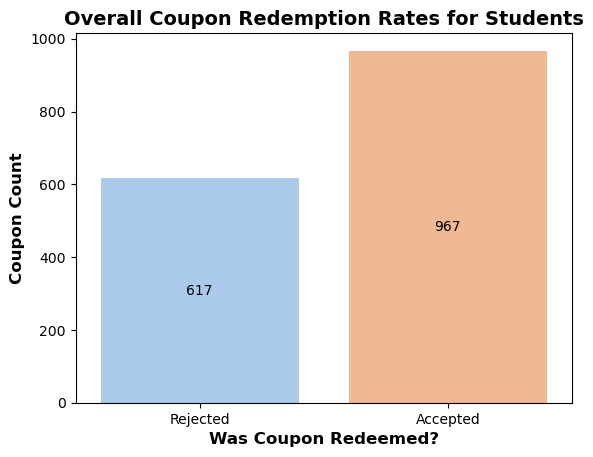

In [273]:
# use a seaborn countplot display the Y Variable showing how many Students accept vs reject a coupon offer overall

Y_variable_plot_students = sns.countplot(data=df_students, x='Y', palette ='pastel')
#increase the font size and make the labels bold for x and y axes
#Set the x-label
Y_variable_plot_students.set_xlabel("Was Coupon Redeemed?", fontsize=12, weight='bold')
#Set the y-label
Y_variable_plot_students.set_ylabel("Coupon Count", fontsize=12, weight='bold')
#Replace the x-axis values 0 and 1 with more understandable text
Y_variable_plot_students.set_xticklabels(["Rejected", "Accepted"])
#Title the graph
Y_variable_plot_students.set_title("Overall Coupon Redemption Counts for Students", fontsize=14, weight='bold')
#add %value labels to bar plot
for p in Y_variable_plot_students.containers:
    Y_variable_plot_students.bar_label(p, label_type='center')

###### 967 students accepted the coupons (61.05%) while 617 (38.95%) rejected them

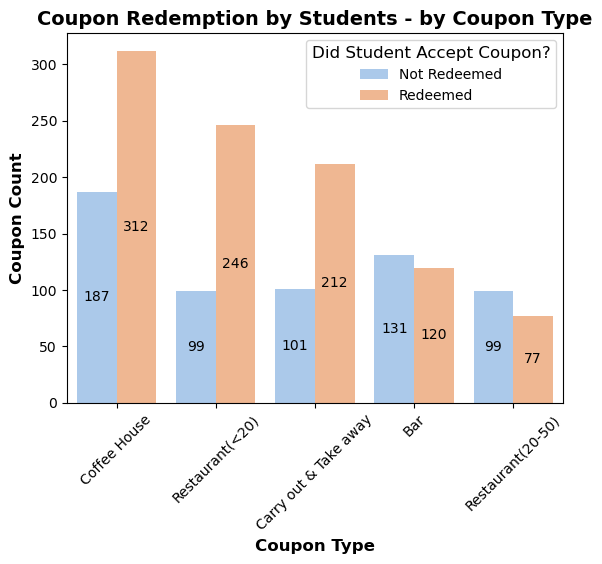

In [276]:
## Now analyze whether the coupon was redeemed by the Student segmented by coupon type

#Create a countplot splitting the bars by the 'Y' column, and show the split between the values 1 and 0 for each 'coupon' value 
student_acceptance_by_couponType = sns.countplot(data=df_students, x='coupon', hue='Y', palette ='pastel', order=df['coupon'].value_counts().index)

#rotate the x labels to be more readable
plt.xticks(rotation=45)
#increase the font size and make the labels bold for x and y axes
#Set the x-label
student_acceptance_by_couponType.set_xlabel("Coupon Type", fontsize=12, weight='bold')
#Set the y-label
student_acceptance_by_couponType.set_ylabel("Coupon Count", fontsize=12, weight='bold')
# Change the legend title and labels
student_acceptance_by_couponType.legend(title='Did Student Accept Coupon?', labels=['Not Redeemed', 'Redeemed'], title_fontsize=12)

#Title the graph
student_acceptance_by_couponType.set_title("Coupon Redemption by Students - by Coupon Type", fontsize=14, weight='bold')
#add %value labels to bar plot
for p in student_acceptance_by_couponType.containers:student_acceptance_by_couponType.bar_label(p, label_type='center')

#Save the plot:
plt.savefig('', format='jpg', dpi=300)


    ##### Coffee House Coupons appear to have done the best the Student population with 312 coupons redeemed, while cheap restaurant coupons had 246 coupons redeemed and Carry Out and Take Away had 212 coupons redeemed.  The other coupon types had less redeemed than rejected.  However, this is deceiving because they are not presented as percentages of coupons offered that were redeemed.

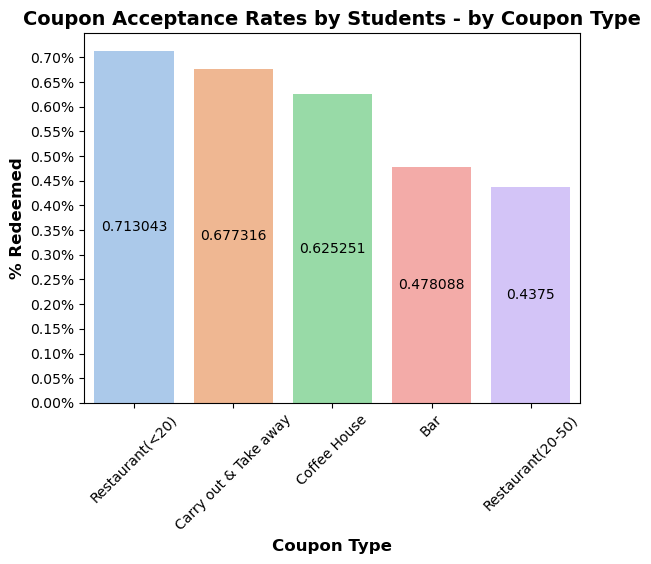

In [315]:
#Display the data in terms of percentages accepted instead of counts

from matplotlib.ticker import (PercentFormatter, FixedLocator)

#Create new percent columns in data frame and use the lambda function to get the percentage
## using .assign(inplace=True) adds the columns in the original dataframe and not a copy
df_students.assign(pct_redeemed = df_students.groupby(['coupon'])['Y'].transform(lambda x: x.eq(1).mean()),
                   pct_not_redeemed = df_students.groupby(['coupon'])['Y'].transform(lambda x: x.eq(0).mean()), 
                   inplace=True)

# sort by % redeemed
df_students = df_students.sort_values(by='pct_redeemed', ascending=False)

# create bar plot in seaborn
student_acceptance_by_couponTypePercent = sns.barplot(data=df_students, x='coupon', y='pct_redeemed', 
                                            palette ='pastel')

#rotate the x labels to be more readable
plt.xticks(rotation=45)
#increase the font size and make the labels bold for x and y axes

#Set the x-label
student_acceptance_by_couponTypePercent.set_xlabel("Coupon Type", fontsize=12, weight='bold')

#Set the y-label
student_acceptance_by_couponTypePercent.set_ylabel("% Redeemed", fontsize=12, weight='bold')
yticks = FixedLocator([i/100 for i in range(0,101,5)])
yformatter = PercentFormatter(xmax=1)
student_acceptance_by_couponTypePercent.yaxis.set_major_locator(yticks)
student_acceptance_by_couponTypePercent.yaxis.set_major_formatter(PercentFormatter())


#Title the graph
student_acceptance_by_couponTypePercent.set_title("Coupon Acceptance Rates by Students - by Coupon Type", fontsize=14, weight='bold')

#add %value labels to bar plot
#for i, p in enumerate(student_acceptance_by_couponTypePercent.containers):
 #   height = p.get_height()
  #  student_acceptance_by_couponTypePercent.text(i, height, '{:.0%}'.format(height), ha='center')
    
    
#add %value labels to bar plot
for p in student_acceptance_by_couponTypePercent.containers:student_acceptance_by_couponTypePercent.bar_label(p, label_type='center')


##### Looking at the data as Percentage Accepted, the clear best performing Coupon Types were the Restaurants under 20 dollars (71.3%), the Carry Out & Take Away (67.7% accepted), and then Coffee houses (62.5% accepted).  Then it drops significantly to only 47.8% bar coupons accepted by Students and 43.75% more expensive restaurants 20-50 dollars accepted by Students. 


##### The recommendation for this year's "College Coupon Campaign" would be to focus on offering the students on college campuses only the coupons for the top 3 performing restaurant types (under 20, carry out/take away and coffee houses)